Visualising the right nullspace for Stokes system using the anelastic liquid approximation (ALA)
================================================================================================

This tutorial will demonstrate how to compute and provide the right-nullspace for pressure solutions
in the Stokes system in G-ADOPT.

The **nullspace** (or kernel) of a matrix $M$ is defined as the set of all vectors $\mathbf{v}$ such that: $M\mathbf{v} = \mathbf{0}$
This includes all vectors that are mapped to the zero vector by the linear transformation represented by $M$. The dimension of this space, known as the nullity of $M$, indicates the number of linearly independent solutions to the equation $M\mathbf{v} = \mathbf{0}$.

Left Nullspace (Transpose Nullspace)
------------------------------------
The **left nullspace** (or transpose nullspace) of a matrix $M$ is the nullspace of $M^T$, consisting of all vectors $\mathbf{w}$ that satisfy: $M^T\mathbf{w} = \mathbf{0}$.
Vectors in the left nullspace are orthogonal to the columns of $M$, meaning each vector $\mathbf{w}$ is orthogonal to every column vector of $M$.

Approximations and Equations
----------------------------
In G-ADOPT, and in general for geodynamic applications, we have three approximations for the Stokes equations. [All the bar'ed variables (e. g., $\bar{\rho}$) are only radially varying].

| Approximation | Equations |
| ------------- | --------- |
| **(Extended) Boussinesq Approximation** | $$\nabla \cdot u = 0$$ $$\nabla \cdot \mu[\nabla u + (\nabla u) ^ T] - \nabla p = \hat{e}_{r} Ra T$$ |
| **Truncated Anelastic Liquid Approximation(TALA)** | $$\nabla \cdot \left(\bar{\rho} u\right) = 0$$ $$\nabla \cdot \mu[\nabla u + (\nabla u) ^ T - (2/3) \nabla \cdot u I] - \nabla p = \bar{g}\bar{\rho}\bar{\alpha}\hat{e}_{r} Ra T$$ |
| **Anelastic Liquid Approximation(ALA)** |$$\nabla \cdot \left(\bar{\rho} u\right) = 0$$ $$\nabla \cdot \mu[\nabla u + (\nabla u) ^ T - (2/3) \nabla \cdot u I] - \nabla p + \bar{g} \bar{\rho} \bar{\chi}(D / \gamma_r)(\bar{C_v} / \bar{C_v}) p = \bar{g}\bar{\rho}\bar{\alpha} \hat{e}_{r} Ra T$$ |

Discrete Form and Pressure Nullspaces
-------------------------------------
In its simplest form of the discrete form, which is for the Boussinesq approximation, we have the notation:

$$
      M
      \begin{pmatrix} u \\ p \end{pmatrix}
      = \begin{pmatrix}
        A & B^T \\
        B & 0
      \end{pmatrix}
      \begin{pmatrix} u \\ p \end{pmatrix}
      = \begin{pmatrix} f \\ 0 \end{pmatrix}
$$

where $Au$ is the block associated with the strain-rate term, $B ^ T p$ is
the gradient of pressure, and $B u$ is the continuity equation. When
extending to TALA(see above), $M$ is not symmetric anymore, and it changes
to,

$$
\begin{pmatrix}
      A ^ {\prime} & B ^ T \\
      B_{\rho} & 0
\end{pmatrix}
$$

with $B_{\rho}$ being the term associated with the mass conservation equation $\nabla \cdot \left(\bar{\rho} u\right)$. Furthermore, extending to ALA, we will have

$$
\begin{pmatrix}
      A ^ {\prime} & B ^ T + B_p \\
      B_{\rho} & 0
\end{pmatrix}
$$

with $B_p p$ associated with $\bar{g} \bar{\rho} \bar{\chi}(D / \gamma_r)(\bar{C_p} /\bar{C_v}) p$. Considering all the above, we will have the following for (right) nullspaces and transpose (left) nullspaces:


| Approximation | Discrete Form | (Right) Nullspace | Transpose (Left) Nullspace |
| ------------- | ------------- | ----------------- | -------------------------- |
| **Boussinesq Approximation** | $$\begin{pmatrix} A & B ^ T \\ B & 0 \end{pmatrix} \begin{pmatrix}u \\ p\end{pmatrix} = \begin{pmatrix}f \\ 0 \end{pmatrix}$$ | Solution to $B ^ T v = 0$, which in strong form is $\nabla p = 0$, i.e. the nullspace consists of all **constant** pressure solutions | Solution to $B ^ T w = 0$, which in strong form is $\nabla p = 0$, i.e. the transpose nullspace consists of all **constant** pressure solutions. |
| **Truncated Anelastic Liquid Approximation(TALA)** | $$\begin{pmatrix} A' & B ^ T \\ B_{\rho} & 0 \end{pmatrix} \begin{pmatrix}u \\ p\end{pmatrix} = \begin{pmatrix}f \\ 0\end{pmatrix}$$ | *Like above:* Solution to $B ^ T v = 0$, which in strong form is $\nabla p = 0$, i.e. the nullspace consists of all **constant** pressure solutions. | Solution to $B_p ^ T w = 0$, which in weak form corresponds to $ - \int \nabla p \cdot \bar{\rho} u = 0$ for any $u\in V$, which analytically is $p = C$, i.e. the nullspace consists of all **constant** pressure solutions. |
| **Anelastic Liquid Approximation(ALA)** | $$\begin{pmatrix} A' & B ^ T + \bar{B}_p \\ B_{\rho} & 0 \end{pmatrix} \begin{pmatrix}u \\ p\end{pmatrix} = \begin{pmatrix}f \\ 0\end{pmatrix}$$ | Solution to $\left[B ^ {T} + \bar{B}_p\right] p = 0$. which in strong form is the solution to  $\nabla p - \bar{g}\bar{\rho} \bar{\chi}(D / \gamma_r)(\bar{C_p} / \bar{C_v}) p \hat{e}_r = 0$ or analytically $p = C \exp(\int_r \bar{g}\bar{\rho} \bar{\chi}(D / \gamma_r)(\bar{C_p} / \bar{C_v})  dr)$ | *Like above:* Solution to $B_p^T w = 0$, which in strong form is $ - \int \nabla p \cdot \bar{\rho} u = 0$  which analytically is $p = C$, i.e. the nullspace consists of all **constant** pressure solutions. |

In other words, in most cases the nullspace for pressure consists simply consists of all constant pressure solutions, but with the
Anelastic Liquid Approximation, the introduction of the pressure-dependent buoyancy term $B_p$ causes the nullspace solutions to be
non-constant. Note that all of this only applies for closed domains, with a no-normal flow condition on all boundaries; If, on
the other hand, at any boundary a stress condition is applied, there are no (nontrivial) pressure null modes, and so the nullspace is simply $\{0\}$.

How does it work in G-ADOPT
-------------------------
Here we demonstrate how the right-pressure nullspace is provided in G-ADOPT.
As always we start by import gadopt.

In [1]:
from gadopt import *

For directly accessing the pressure nullspace we import `ala_right_nullspace` withing G-ADOPT's stokes_integrators submodule.

In [2]:
from gadopt.stokes_integrators import ala_right_nullspace

From here on, the setup will be exactly as the demo for the Anelastic-Liquid Approximation case.

In [3]:
# Set up geometry:
mesh = UnitSquareMesh(40, 40, quadrilateral=True)  # Square mesh generated via firedrake
mesh.cartesian = True

left_id, right_id, bottom_id, top_id = 1, 2, 3, 4  # Boundary IDs

# Function spaces
V = VectorFunctionSpace(mesh, "CG", 2)  # Velocity function space (vector)
W = FunctionSpace(mesh, "CG", 1)  # Pressure function space (scalar)
Q = FunctionSpace(mesh, "CG", 2)  # Temperature function space (scalar)
Z = MixedFunctionSpace([V, W])  # Mixed function space.

# Compressible reference state:
X = SpatialCoordinate(mesh)
T0 = Constant(0.091)  # Non-dimensional surface temperature
Di = Constant(0.5)  # Dissipation number.
Ra = Constant(1e5)  # Rayleigh number
gruneisen = 1.0
rhobar = Function(Q, name="CompRefDensity").interpolate(exp(((1.0 - X[1]) * Di) / gruneisen))
Tbar = Function(Q, name="CompRefTemperature").interpolate(T0 * exp((1.0 - X[1]) * Di) - T0)

#
alphabar = Function(Q, name="IsobaricThermalExpansivity").assign(1.0)
cpbar = Function(Q, name="IsobaricSpecificHeatCapacity").assign(1.0)
chibar = Function(Q, name="IsothermalBulkModulus").assign(1.0)

ala = AnelasticLiquidApproximation(Ra, Di, rho=rhobar, Tbar=Tbar, alpha=alphabar, chi=chibar, cp=cpbar)
p = ala_right_nullspace(W, approximation=ala, top_subdomain_id=top_id)

Note that the right-nullspace solution is calculated last, using `ala_right_nullspace`,
which returns a Firedrake `Function` which can be plotted as below:

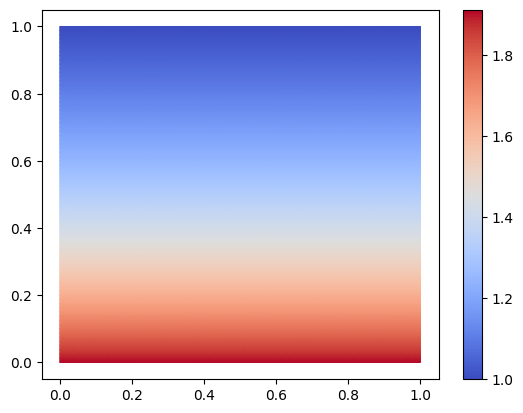

In [4]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots()
collection = tripcolor(p, axes=axes, cmap='coolwarm')
fig.colorbar(collection)

The nullspace based on this nullspace solution, should be provided to the Stokes solver for obtaining correct and efficient solutions.
In G-ADOPT this works using the same interface for generating stokes nullspaces, i.e. `create_stokes_nullspace`. That is
for all practical matters, this is how we generate the right-nullspace for the stokes equations:

In [5]:
Z_nullspace = create_stokes_nullspace(
    Z, closed=True, rotational=False,
    ala_approximation=ala, top_subdomain_id=top_id)

where the anelastic-liquid approximation, and a domain for the top boundary is provided. In the case of the ALA approximation,
the _transpose_ (left) nullspace, is simply the same as that for other approximations, and so we call `create_stokes_nullspace` without
providing the `AnelasticLiquidApproximation` object `ala`:

In [6]:
Z_nullspace_transpose = create_stokes_nullspace(
    Z, closed=True, rotational=False)